# Accessing Argo data by float using Argopy

Although the goal of the Argo Online school is to teach the basics of the Argo data, and therefore, we explain the data using the primary source, it is worth mentioning **argopy**:

<img src="https://raw.githubusercontent.com/euroargodev/argopy/master/docs/_static/argopy_logo_long.png" alt="argopy" width="200"/> is a python library dedicated to Argo data access, manipulation and visualisation for standard users as well as Argo experts. the Argo dataset is very complex: with thousands of different variables, tens of reference tables and a user manual more than 100 pages long: argopy aims to help you navigate this complex realm.

In this notebook we show a few examples, but we refer to the [argopy Gallery](https://argopy.readthedocs.io/en/latest/gallery.html) for a more detailled explanation:

Fist, as usual, import the libraries:

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import xarray as xr
xr.set_options(display_expand_attrs = False)

Import argopy and set-up a data fetcher:

In [4]:
import argopy
argopy.reset_options()
argopy.clear_cache()

from argopy import ArgoFloat
from argopy import ArgoIndex
from argopy.stores import gdacfs

You can load all profiles from a float:

In [9]:
apDS = ArgoFloat(6901254).open_dataset('prof')

In [11]:
apDS 

<xarray.Dataset> Size: 3MB
Dimensions:                       (N_PROF: 166, N_PARAM: 3, N_LEVELS: 98,
                                   N_CALIB: 1, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     <U16 64B ...
    FORMAT_VERSION                <U4 16B ...
    HANDBOOK_VERSION              <U4 16B ...
    REFERENCE_DATE_TIME           datetime64[ns] 8B ...
    DATE_CREATION                 datetime64[ns] 8B ...
    DATE_UPDATE                   datetime64[ns] 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) <U1 0B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) <U1 0B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) <U1 0B ...
Attributes: (8)

In [12]:
apDS.TEMP

<xarray.DataArray 'TEMP' (N_PROF: 166, N_LEVELS: 98)> Size: 65kB
[16268 values with dtype=float32]
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes: (9)

The core-Argo profile files contain the core parameters provided by a float: pressure, temperature, salinity, conductivity (PRES, TEMP, PSAL, CNDC).

Now, let's see how this argopy data set works as a xarray, and it easy to plot any data. Let's begin ploting the first two profiles:

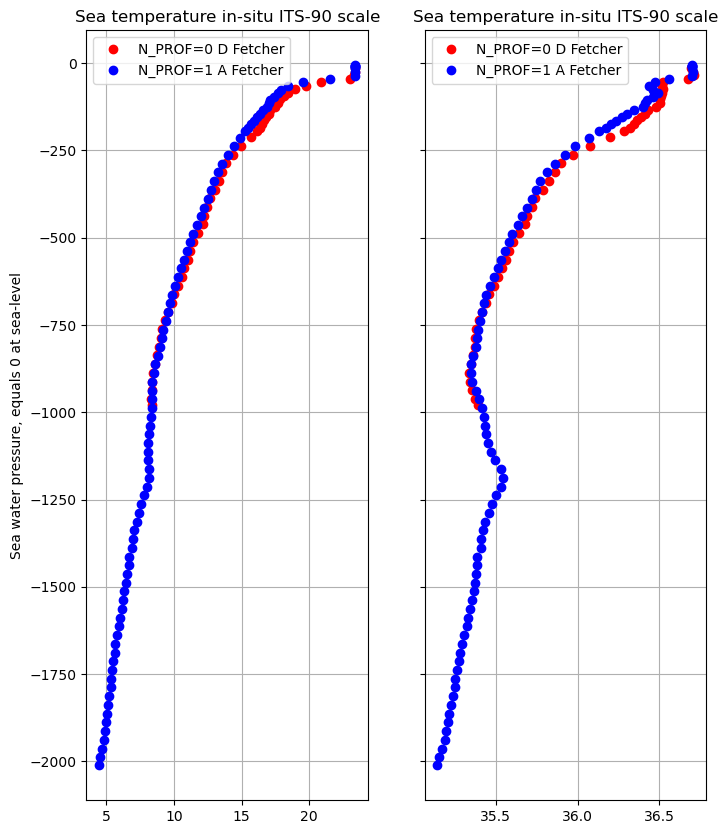

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(8,10), sharey=True)

#Temperature
ax[0].plot(apDS.TEMP[0,:],-apDS.PRES[0,:],'ro',label='N_PROF=0 D Fetcher')
ax[0].plot(apDS.TEMP[1,:],-apDS.PRES[1,:],'bo',label='N_PROF=1 A Fetcher')
ax[0].set_title(apDS['TEMP'].attrs['long_name'])
ax[0].set_ylabel(apDS['PRES'].attrs['long_name'])
ax[0].grid()
ax[0].legend();

ax[1].plot(apDS.PSAL[0,:],-apDS.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[1].plot(apDS.PSAL[1,:],-apDS.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[1].set_title(apDS['TEMP'].attrs['long_name'])
ax[1].grid()
ax[1].legend();

and of course the locations of these two profiles and the rest of them:

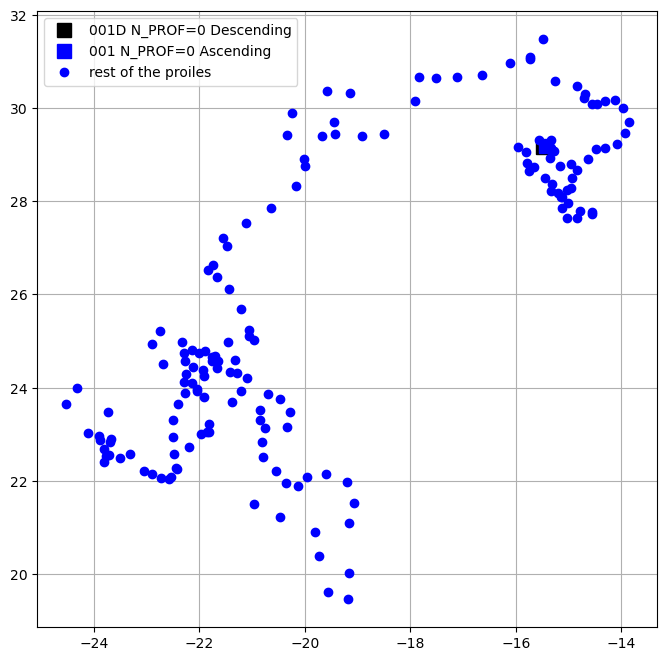

In [18]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(apDS.LONGITUDE[0],apDS.LATITUDE[0],'ks',markersize=10,label='001D N_PROF=0 Descending')
ax.plot(apDS.LONGITUDE[1],apDS.LATITUDE[1],'bs',markersize=10,label='001 N_PROF=0 Ascending')
ax.plot(apDS.LONGITUDE[2:],apDS.LATITUDE[2:],'bo',label='rest of the proiles')
ax.grid()
ax.legend();

or using the plotting routines of argopy, easyly we can plot the full trayectory

/Users/pvb/miniconda3/envs/AOS/lib/python3.13/site-packages/argopy/plot/plot.py:489: UserWarning: More than one N_LEVELS found in this dataset, scatter_map will use the first level only
  warnings.warn(


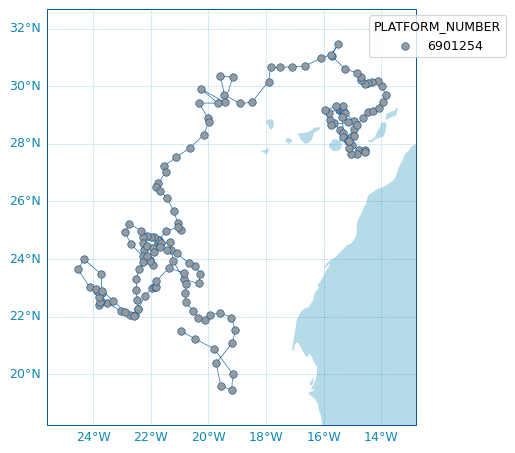

In [19]:
scatter_map(apDS, set_global=False);

argopy is powerfull with continous updates, an de refer to the [argopy Documentation](https://argopy.readthedocs.io) for a more detailled explanation of its capabilities.